<a href="https://colab.research.google.com/github/d-tomas/transform4europe/blob/main/notebooks/visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualisation

In this *notebook* we are going to apply some data visualisation techniques. We will mainly use Pandas library to store the tabular data and Seaborn to visualise it.

## Initial setup

In [ ]:
# Import the Python libraries used in this notebook

import matplotlib.pyplot as plt  # For charting
import pandas as pd
import seaborn as sns  # For charting
from wordcloud import WordCloud  # To create word clouds
import spacy  # For text analysis (previous to word clouds)

spacy.cli.download('en_core_web_md')  # To install the Spacy model and analyse English texts
sns.set_style('whitegrid')  # Adds a rather cute background grid in Seaborn

We are working again with the historical video game sales data. Remember, each row contains the following information:

* `Rank`: total sales ranking
* `Name`: name of de video game
* `Platform`: platform where the game was published (e.g. PC, PS4, ...)
* `Year`: year of publication
* `Genre`: genre of the game (e.g. action, shooter, sports, ...)
* `Publisher`: publishing company
* `NA_Sales`: sales in North America (in millions of copies)
* `EU_Sales`: sales in Europe (in millions of copies)
* `JP_Sales`: sales in Japan (in millions of copies)
* `Other_Sales`: sales in the rest of the world (in millions of copies)
* `Global_Sales`: global sales wordlwide (in millions of copies)

In [ ]:
# Load the data in CSV format

data = pd.read_csv('https://raw.githubusercontent.com/d-tomas/transform4europe/main/datasets/video_game_sales.csv')
data

## Anscombe's quartet

Before we start working with the data on video game sales, let's take a look at a practical example of the importance of visualisation in the interpretation of the data.

**Anscombe's quartet** consists of four datasets created by Frank Anscombe in 1973. Their descriptive statistics (mean, variance, correlation and regression) are almost identical. However, their distributions are very different when displayed on a plot.

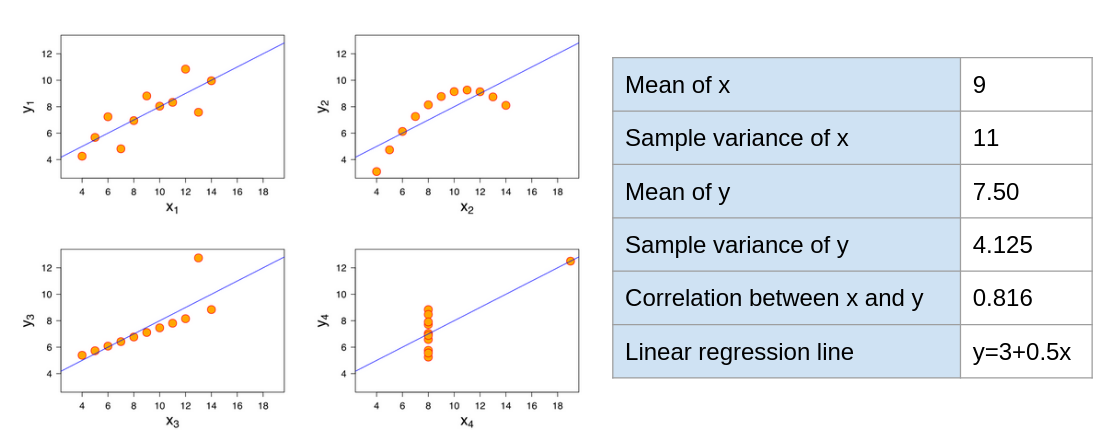

In [ ]:
# Let's download two datasets for this example

!wget https://raw.githubusercontent.com/d-tomas/transform4europe/main/datasets/anscombe_1.csv
!wget https://raw.githubusercontent.com/d-tomas/transform4europe/main/datasets/anscombe_2.csv

In [ ]:
# Create a table with Pandas for each file

anscombe_1 = pd.read_csv('anscombe_1.csv')
anscombe_2 = pd.read_csv('anscombe_2.csv')

In [ ]:
# Show their content on the screen to see what they look like.

anscombe_1

In [ ]:
# And the other

anscombe_2

In [ ]:
# It's hard to see whether or not the two sets look alike at first glance...
# Let's calculate their basic statistics: mean, standard deviation and correlation

print('Dataset Anscombe 1')
print('Samples: ' + str(len(anscombe_1.index)))
print('Mean of x: ' + '{:.3f}'.format(anscombe_1.mean()['x']))
print('Mean of y: ' + '{:.3f}'.format(anscombe_1.mean()['y']))
print('Desviation of x: ' + '{:.3f}'.format(anscombe_1.std()['x']))
print('Desviation of y: ' + '{:.3f}'.format(anscombe_1.std()['y']))
print('Correlation: ' + '{:.3f}'.format(anscombe_1.corr()['x']['y']))

In [ ]:
# Lo mismo para el segundo dataset

print('Dataset Anscombe 2')
print('Samples: ' + str(len(anscombe_2.index)))
print('Mean of x: ' + '{:.3f}'.format(anscombe_2.mean()['x']))
print('Mean of y: ' + '{:.3f}'.format(anscombe_2.mean()['y']))
print('Desviation of x: ' + '{:.3f}'.format(anscombe_2.std()['x']))
print('Desviation of y: ' + '{:.3f}'.format(anscombe_2.std()['y']))
print('Correlation: ' + '{:.3f}'.format(anscombe_2.corr()['x']['y']))

In [ ]:
# Visualise the first dataset

sns.scatterplot(data=anscombe_1, x='x', y='y')
plt.show()

In [ ]:
# Visualise the second dataset

sns.scatterplot(data=anscombe_2, x='x', y='y', color='green')
plt.show()

## Bar chart

* Useful for visualising distributions of discrete or categorical values (e.g. years, names of countries, types of TV screens, ...)
* Graphically represents the comparison between different categories (e.g. to compare sales by year)


In [ ]:
# What year were the most video games sold?

plt.figure(figsize=(14,7))
sns.countplot(x='Year', data=data)
plt.xticks(rotation=-45)  # Rotate labels to avoid overlapping
plt.show()

In [ ]:
# A bar chart can be sorted!
# Repeat the diagram from before, but sorted

plt.figure(figsize=(14, 7))
sns.countplot(x='Year', data=data, order=data['Year'].value_counts().index)
# If we also want to remove the annoying decimal part of the x-axis labels...
locs, labels = plt.xticks()
labels = [int(t) for t in data['Year'].value_counts().index]
plt.xticks(locs, labels, rotation=-45)
plt.show()


In [ ]:
# Another example: which platform has the most games in this ranking?
# Let's use the sorting again to make it look better

plt.figure(figsize=(14,7))
sns.countplot(x='Platform', data=data, order=data['Platform'].value_counts().index)
plt.xticks(rotation=-45)
plt.show()

In [ ]:
# By the way, which genre is the most popular?

plt.figure(figsize=(14,7))
sns.countplot(x='Genre', data=data, order=data['Genre'].value_counts().index)
plt.xticks(rotation=-45)
plt.show()

In [ ]:
# And which company has released the most games?
# Use 'barplot' instead of 'countplot' because in 'publisher_counts' we have already counted how many games there are per company

publisher_counts = data['Publisher'].value_counts()[:20]  # Keep the top twenty

plt.figure(figsize=(14,7))
sns.barplot(x=publisher_counts.index, y=publisher_counts.values)
plt.xticks(rotation=90)  # Rotate labels to avoid overlapping
plt.show()

In [ ]:
# The really important thing: which company has sold the most games all these years?
# Use 'barplot' again for that

publisher_sales = data.groupby(by=['Publisher'])['Global_Sales'].sum()  # Group sales by company
publisher_sales = publisher_sales.sort_values(ascending=False)[:20]  # Keep the top twenty

plt.figure(figsize=(14, 7))
sns.barplot(x=publisher_sales.index, y=publisher_sales.values)
plt.xticks(rotation=90)
plt.show()

## Histogram

* Type of bar chart for displaying distributions of numerical values
* Indicates the number of observations that fall within a range of values (*bin*)

In [ ]:
# Which year sold the most video games?
# Years can be considered as discrete values, so better a bar chart than a histogram, but still

plt.figure(figsize=(14,7))  # Set the size of the figure with Matplotlib
sns.histplot(x='Year', data=data)
plt.show()

In [ ]:
# Create a stacked chart distinguishing games of each genre by year
# Define the set of bins on the x-axis
# The 'hue' parameter allows to add one more dimension to the plot

plt.figure(figsize=(14, 7))
sns.histplot(x='Year', data=data, bins=[x for x in range(1980,2020)], hue='Genre', multiple='stack')
plt.show()

## Density plot

* It is a variant of the histogram that uses a Gaussian kernel to smooth the values
* Provides a better view of the shape of the distribution

In [ ]:
# Use kernel density estimation to get a smoother graph
# No longer have to worry about the number of bins

plt.figure(figsize=(14,7))
sns.kdeplot(data=data, x='Year')
plt.show()

In [ ]:
# Overlay the density plot on the previous histogram
# Add to 'histplot' the parameter 'kde=True'

plt.figure(figsize=(14,7))
sns.histplot(x='Year', data=data, bins=[x for x in range(1980,2020)], kde=True)
plt.show()

## Line chart

* Useful for visualising trends
* Very common for time series (e.g. how the number of inhabitants in a city evolves over the years)
* Displays data as points joined by straight lines

In [ ]:
# Compare how sales in different countries evolve over the years

# Keep only interesting columns: year, sales in the USA, in Europe, in Japan and in other countries
year_sales = data[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].groupby(by='Year').sum()

plt.figure(figsize=(14, 7))
sns.lineplot(data=year_sales)
plt.show()

## Scatter plot

* Useful for identifying relationships, patterns or trends between two numerical values
* Allows visualisation of data clusters:
 * Identify extreme values (*outliers*)
 * Explore correlations (if one value implies the other)
* Remember: **Correlation does not imply causation!**

In [ ]:
# What is the relationship between number of releases and overall sales?
# The 'hue' argument of 'relplot' allows expressing a third dimension using colour

combined = pd.concat([publisher_counts, publisher_sales], axis=1).dropna()
combined = combined.reset_index()  # The previous index is added as a column named 'index'
combined = combined.rename(columns={'index': 'Publisher', 'Publisher' : 'Count'})  # Rename columns

sns.relplot(x='Count', y='Global_Sales', hue='Publisher', data=combined, height=7)
plt.show()

## Heat map

* Visualise data by colour-coding in two dimensions (useful for correlations)
* Hue and/or intensity indicates how data vary in space


In [ ]:
# Visualise the number of global sales for each of the platforms

sales_genre = data[['Platform', 'Global_Sales', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].groupby(by=['Platform']).sum()
sales_genre = sales_genre.sort_values(by='Global_Sales', ascending=False)[:10]  # Keep the top 10
sales_genre = sales_genre.drop(labels='Global_Sales', axis='columns')  # Drop the global sales column

plt.figure(figsize=(14, 10))
sns.heatmap(sales_genre, annot=True, fmt='.2f', linewidth=3, cmap='Blues')
plt.yticks(rotation=0)
plt.show()

In [ ]:
# Calculate the correlation in sales of the different countries
# A number close to 1 implies a strong positive correlation (if one goes up, the other goes up)
# A number close to -1 implies negative correlation (if one goes up, the other goes down)
# A number close to 0 implies no correlation

plt.figure(figsize=(14, 10))
sns.heatmap(data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr('spearman'), annot=True, linewidth=3)
plt.show()

## Box plot

* Describes groups of numerical data by quartiles
* Useful for data that do not follow a normal distribution
* Shows the five-number summary:
 * Minimum
 * First quartile (Q1)
 * Median
 * Third quartile (Q3)
 * Maximum

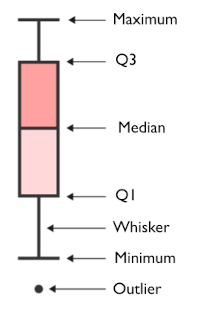

In [ ]:
# First, let's calculate for each year how many games there are of each genre

data2 = pd.DataFrame(columns=data['Genre'].unique())
for column in data2:
  data2[column] = data[data['Genre'] == column].groupby(by=['Year']).count()['Rank']  # 'Rank' or whatever
data2

In [ ]:
# Show the distribution of the number of games by gender over the years

plt.figure(figsize=(15, 10))
sns.boxplot(data=data2)
plt.show()

## Violin plot

* Provides the information of a boxplot and also the distribution of values
* Suitable when there are many values and they cannot be visualised individually

In [ ]:
# Let's continue with the distribution of genres over the years

plt.figure(figsize=(15, 10))
sns.violinplot(data=data2)
plt.show()

## Word cloud

* Visual representation of the words that constitute a text
* The size is larger for the most frequent words

In [ ]:
# First, extract all the individual words that appear in the names of Nintendo video games
# The SpaCy library helps us to extract these words

nlp = spacy.load('en_core_web_md')  # Load the model in English to work with this language

list_words = [x.split() for x in data[data['Publisher'] == 'Nintendo']['Name'].values]  # Obtain all the individual words for each name
list_words = ' '.join([word for sublist in list_words for word in sublist])  # Put them all together in a single text

corpus = nlp(list_words)  # Process words with SpaCy
tokens = [w.lower_ for w in corpus if (not w.is_space and not w.is_punct)]  # Remove white spaces and punctuation
corpus = ' '.join(tokens)  # The clean word list is ready

In [ ]:
# Show the word cloud in a figure

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(corpus)
plt.figure(figsize=(8, 8), facecolor=None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad=0) 
plt.show()

# References

* [Video Game Sales](https://www.kaggle.com/gregorut/videogamesales)
* [Pyplot tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html)
* [Datasaurus](http://www.thefunctionalart.com/2016/08/download-datasaurus-never-trust-summary.html)